In [3]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import torchvision
from pascal_dataset import PASCALDataset
import torch
from engine import train_one_epoch, evaluate
import utils

test_pc = PASCALDataset('/.../PASCAL/test')
train_pc = PASCALDataset('/.../PASCAL/train')
val_pc = PASCALDataset('/.../PASCAL/val')



In [4]:
fast_rcnn = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /root/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth
100%|██████████| 160M/160M [00:00<00:00, 201MB/s]


In [5]:
device = torch.device('cuda')

In [6]:

train = torch.utils.data.DataLoader(
        train_pc, batch_size=2, shuffle=True , collate_fn=utils.collate_fn)
val = torch.utils.data.DataLoader(
        val_pc, batch_size=1, shuffle=True ,  collate_fn=utils.collate_fn)
test = torch.utils.data.DataLoader(test_pc, batch_size=1,
                                  shuffle=True , collate_fn=utils.collate_fn)
fast_rcnn.to(device)
params = [p for p in fast_rcnn.parameters() if p.requires_grad]
optimizer = torch.optim.SGD(params , lr=0.01, momentum=0.9)
for ep in range(5):
        train_one_epoch(fast_rcnn, optimizer, train, device , ep,  print_freq=10)

        evaluate(fast_rcnn, val, device=device)

Epoch: [0]  [  0/501]  eta: 1:22:24  lr: 0.000030  loss: 0.3246 (0.3246)  loss_classifier: 0.1171 (0.1171)  loss_box_reg: 0.1779 (0.1779)  loss_objectness: 0.0117 (0.0117)  loss_rpn_box_reg: 0.0179 (0.0179)  time: 9.8692  data: 0.0327  max mem: 3110
Epoch: [0]  [ 10/501]  eta: 0:11:23  lr: 0.000230  loss: 0.1934 (0.2383)  loss_classifier: 0.0816 (0.0893)  loss_box_reg: 0.1118 (0.1283)  loss_objectness: 0.0070 (0.0081)  loss_rpn_box_reg: 0.0090 (0.0126)  time: 1.3925  data: 0.0161  max mem: 3942
Epoch: [0]  [ 20/501]  eta: 0:07:58  lr: 0.000430  loss: 0.1829 (0.2054)  loss_classifier: 0.0761 (0.0799)  loss_box_reg: 0.0759 (0.1049)  loss_objectness: 0.0066 (0.0082)  loss_rpn_box_reg: 0.0080 (0.0124)  time: 0.5503  data: 0.0153  max mem: 3942
Epoch: [0]  [ 30/501]  eta: 0:06:30  lr: 0.000629  loss: 0.1451 (0.1859)  loss_classifier: 0.0570 (0.0699)  loss_box_reg: 0.0602 (0.0964)  loss_objectness: 0.0051 (0.0076)  loss_rpn_box_reg: 0.0072 (0.0120)  time: 0.5197  data: 0.0150  max mem: 3942


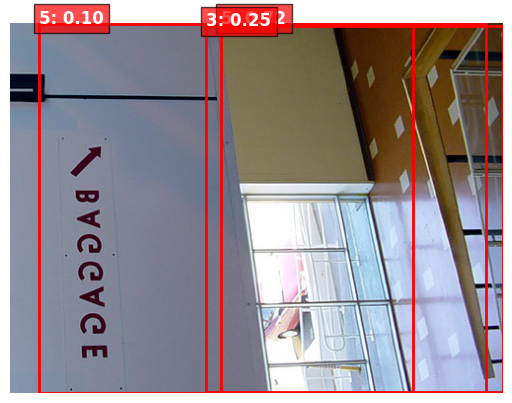

In [10]:
images, labels = next(iter(test))
fast_rcnn.to('cpu')
with torch.no_grad():
    outputs = fast_rcnn(images)
fig, ax = plt.subplots(1)
ax.imshow(np.array(images[0].T))
for box, label, score in zip(outputs[0]['boxes'], outputs[0]['labels'], outputs[0]['scores']):
    ymin, xmin, ymax, xmax = box  
    label = int(label)
    score = float(score)
    ax.add_patch(plt.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin, fill=False, edgecolor='red', linewidth=2))
    ax.text(xmin, ymin, f'{label}: {score:.2f}', fontsize=12, color='white', weight='bold', 
            bbox=dict(facecolor='red', alpha=0.7))
    ax.axis('off')